# The Packages

In [1]:
import numpy as np
import pandas as pd
import os
import gc
import datetime
import warnings

In [53]:
# DATA VISUALIZATION
# ------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.0, 6.0)
sns.set_style("darkgrid")
sns.color_palette("mako", as_cmap=True)
import plotly.express as px


In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import signal

In [4]:
# CONFIGURATIONS
# ------------------------------------------------------
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')


# The Data

In [44]:
trainDf = pd.read_csv('Dataset/trainDf.csv')

In [46]:
trainDf.drop(["Open", "High","Low", "Adj Close", "Volume"], axis=1, inplace= True)

In [47]:
trainDf['Date'] = pd.to_datetime(trainDf['Date'])
trainDf = trainDf.groupby('Date').sum()
trainDf = trainDf.asfreq(freq ='D')
trainDf['Close'] = trainDf['Close'].ffill()
trainDf.shape

(6262, 1)

In [49]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6262 entries, 2000-01-03 to 2017-02-23
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   6262 non-null   float64
dtypes: float64(1)
memory usage: 97.8 KB


In [50]:
decomposeData = seasonal_decompose(trainDf, model="additive")

<Figure size 1500x1000 with 0 Axes>

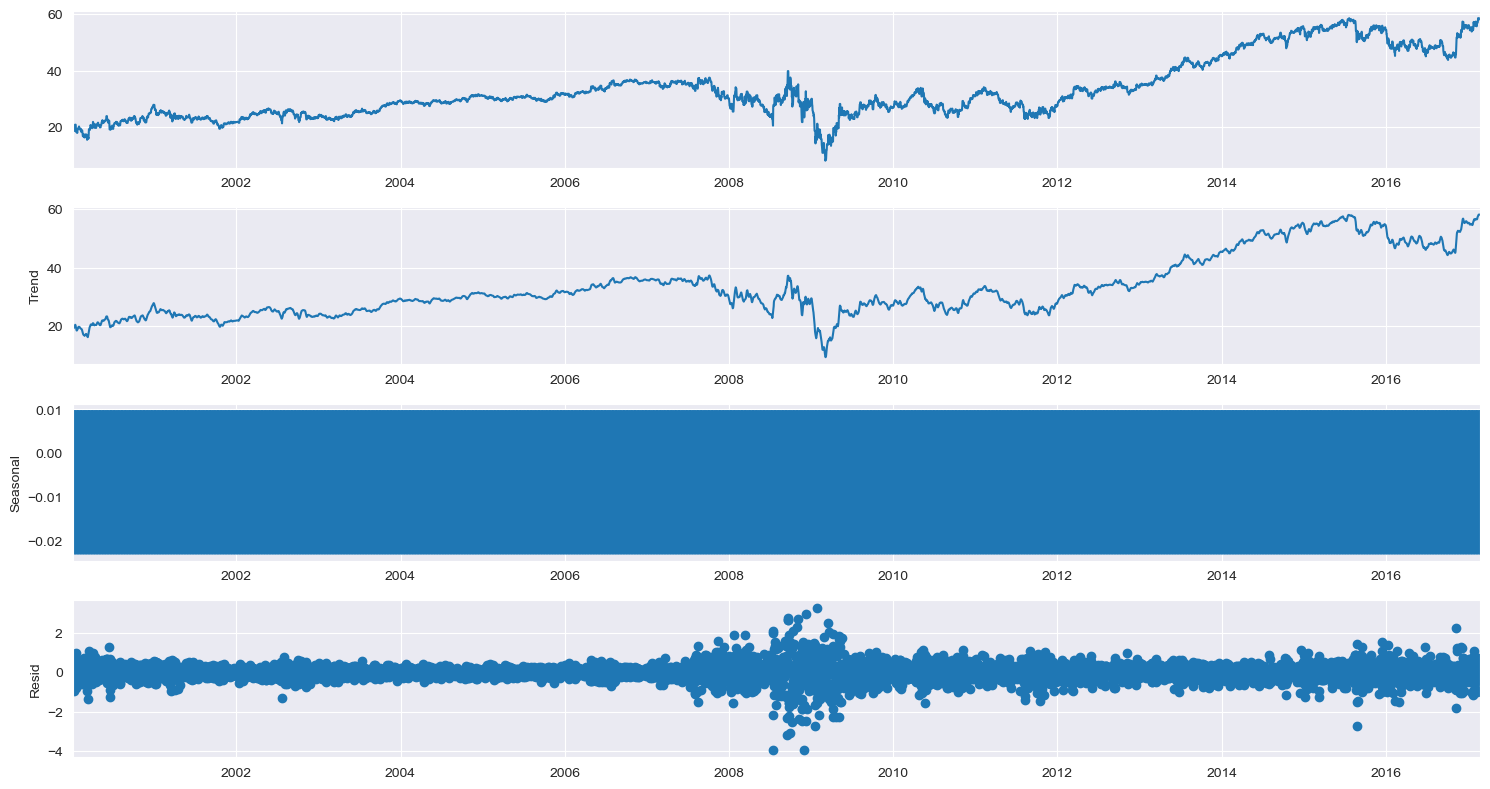

In [60]:
plt.figure(figsize=(15,10)) 
decomposeData.plot();

In [64]:
from statsmodels.graphics.tsaplots import plot_acf


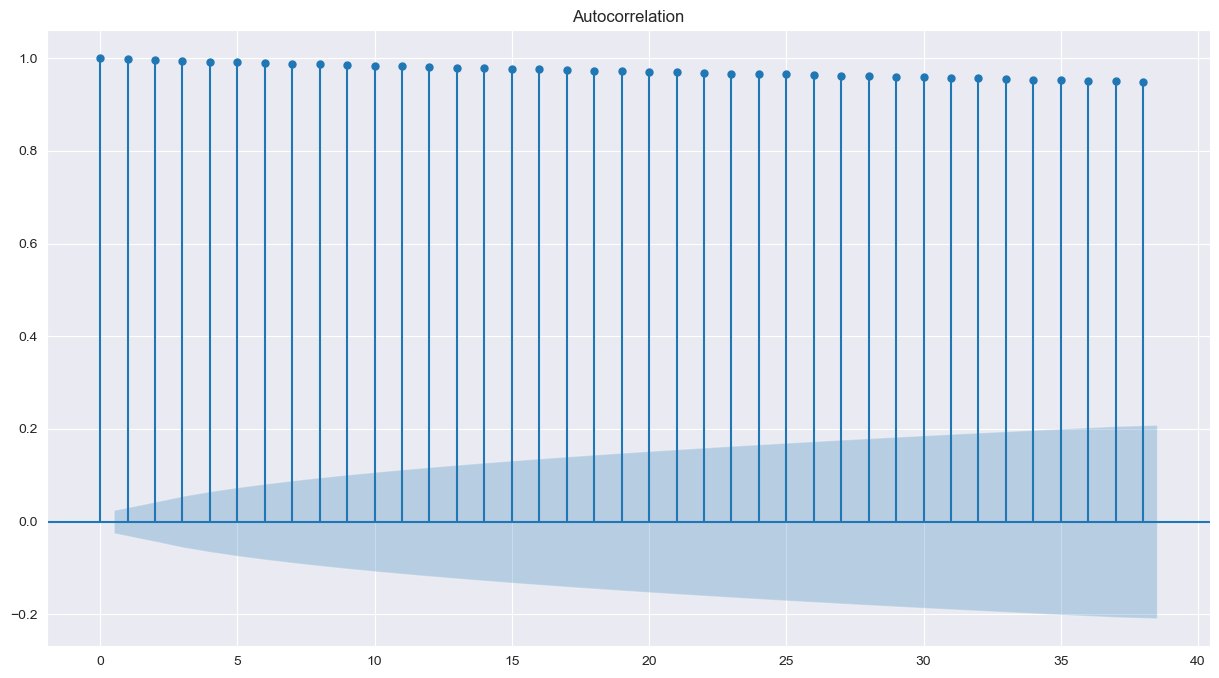

In [65]:
plot_acf(trainDf);

# Detrending

<AxesSubplot:xlabel='Date'>

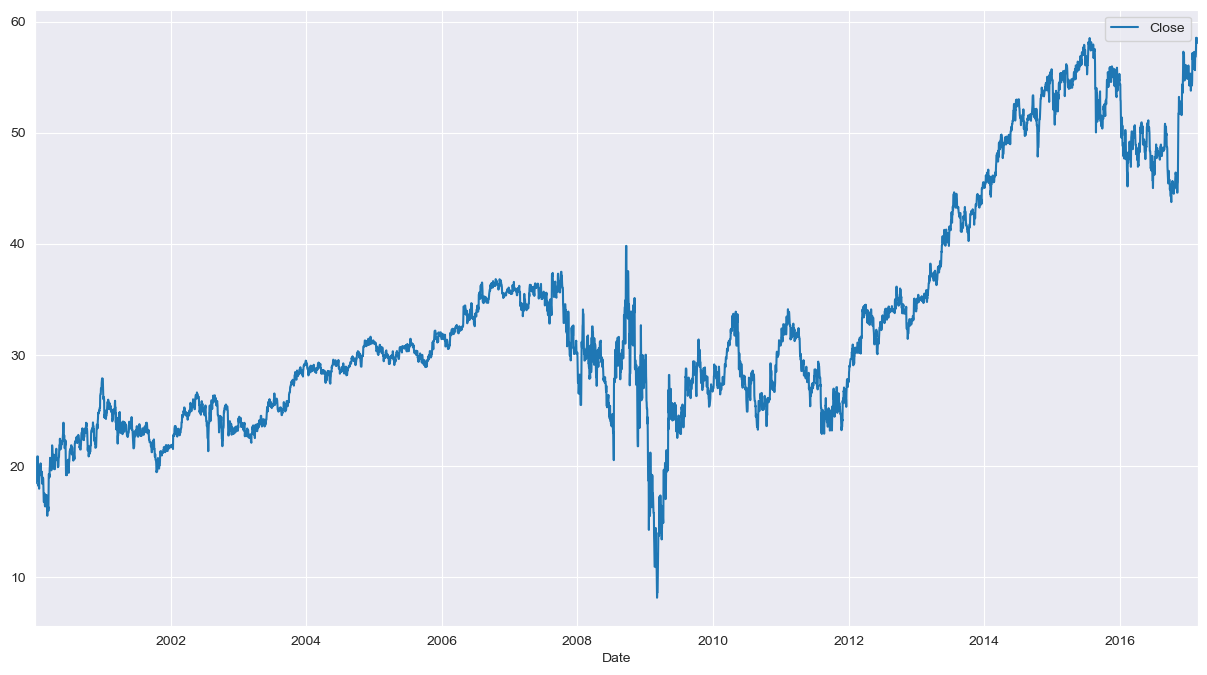

In [61]:
trainDf.plot()

In [62]:
detrended = signal.detrend(trainDf.Close, type= 'linear')
detrendedDf = pd.DataFrame(detrended)


<AxesSubplot:>

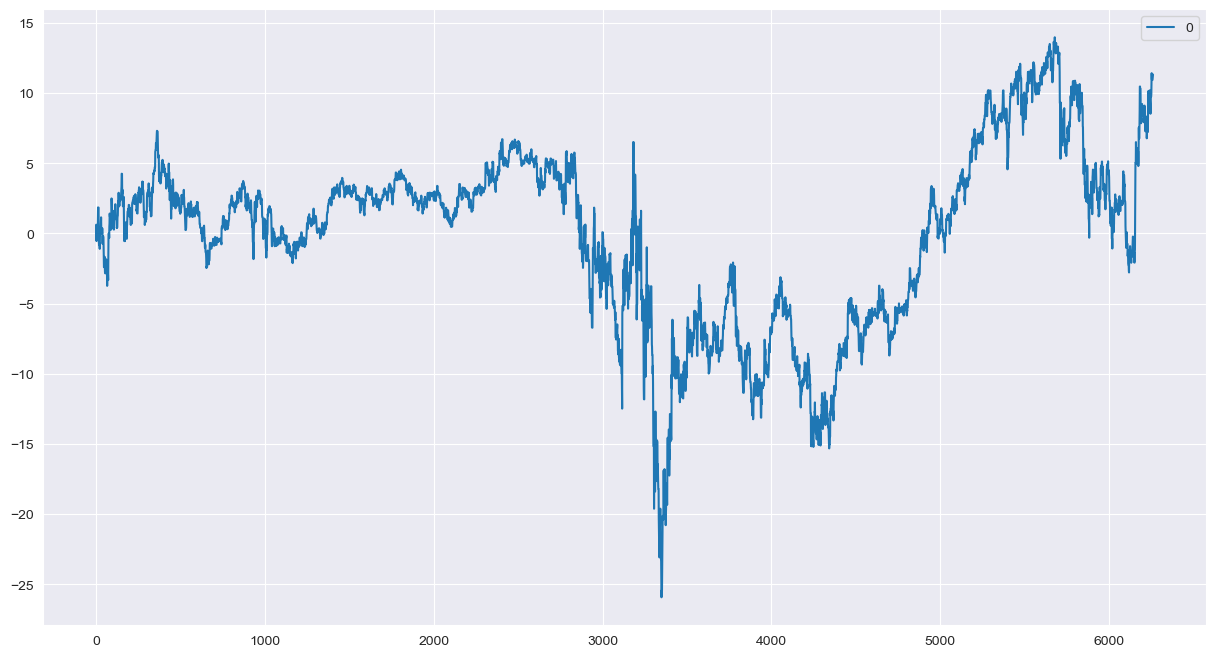

In [63]:
detrendedDf.plot()